In [ ]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("himelsarder/road-accident-survival-dataset")

for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_path = os.path.join(path, filename)
        break
a = pd.read_csv(csv_path)
a

100%|██████████| 1.19k/1.19k [00:00<00:00, 856kB/s]

Extracting files...


,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0
...,...,...,...,...,...,...
195,69,Female,111.0,No,Yes,1
196,30,Female,51.0,No,Yes,1
197,58,Male,110.0,No,Yes,1
198,20,Male,103.0,No,Yes,1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = a.copy()

# Convert categorical columns to numerical using Label Encoding
label_cols = ["Gender", "Helmet_Used", "Seatbelt_Used"]
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Handle missing values by imputing with the mean for numerical columns
df["Speed_of_Impact"].fillna(df["Speed_of_Impact"].mean(), inplace=True)
df.dropna(inplace=True)
df = df.astype(float)
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    float64
 1   Gender           200 non-null    float64
 2   Speed_of_Impact  200 non-null    float64
 3   Helmet_Used      200 non-null    float64
 4   Seatbelt_Used    200 non-null    float64
 5   Survived         200 non-null    float64
dtypes: float64(6)
memory usage: 9.5 KB
None
    Age  Gender  Speed_of_Impact  Helmet_Used  Seatbelt_Used  Survived
0  56.0     0.0             27.0          0.0            0.0       1.0
1  69.0     0.0             46.0          0.0            1.0       1.0
2  46.0     1.0             46.0          1.0            1.0       0.0
3  32.0     1.0            117.0          0.0            1.0       0.0
4  60.0     0.0             40.0          1.0            1.0       0.0


<ipython-input-3-64891309c6fa>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Speed_of_Impact"].fillna(df["Speed_of_Impact"].mean(), inplace=True)


**Scatter Plot**

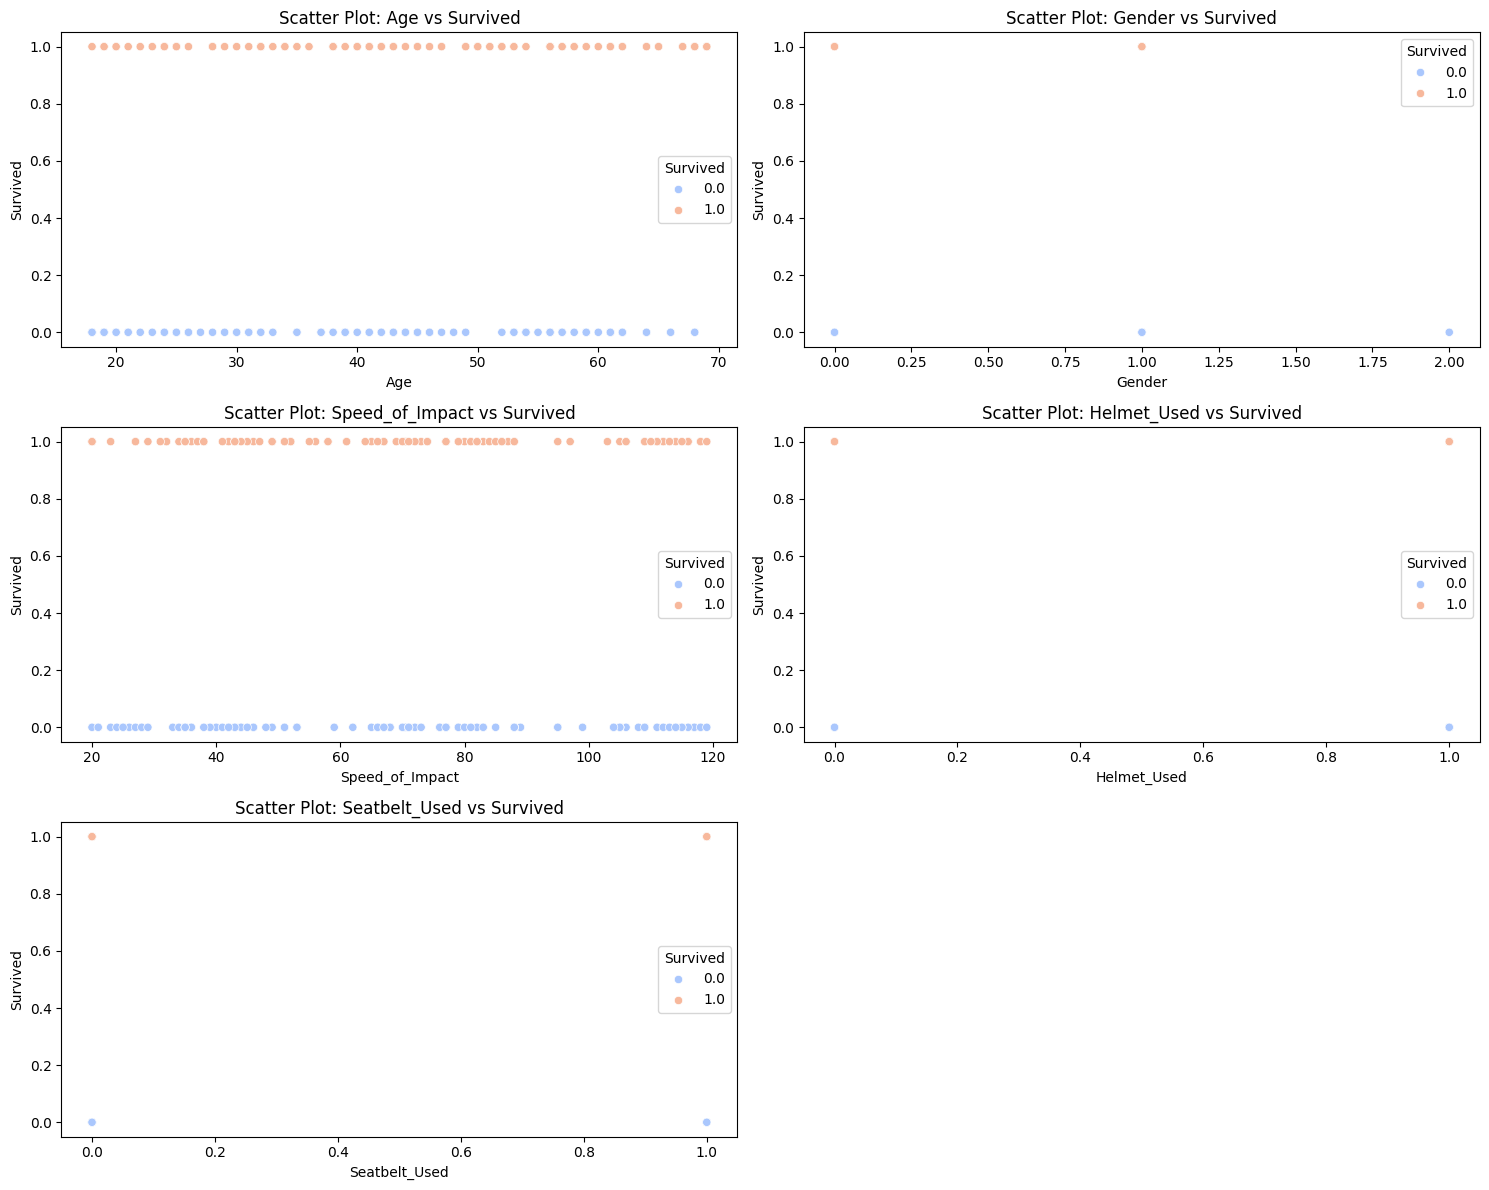

In [ ]:
columns = ["Age", "Gender", "Speed_of_Impact", "Helmet_Used", "Seatbelt_Used", "Survived"]

# Generate scatter plots for all column pairs
plt.figure(figsize=(15, 12))
for i, col in enumerate(columns):
    if col != "Survived":
        plt.subplot(3, 2, i + 1)
        sns.scatterplot(x=df[col], y=df["Survived"], hue=df["Survived"], palette="coolwarm")
        plt.xlabel(col)
        plt.ylabel("Survived")
        plt.title(f"Scatter Plot: {col} vs Survived")

plt.tight_layout()
plt.show()


**Time Series Plot**

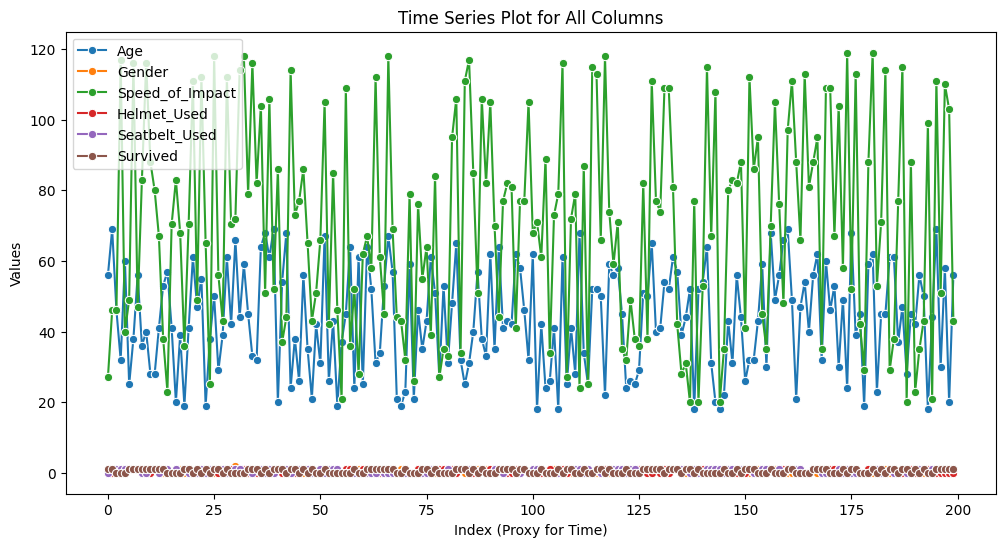

In [ ]:
plt.figure(figsize=(12, 6))

# Plot each numerical column over the index
for col in df.columns:
    sns.lineplot(x=df.index, y=df[col], label=col, marker="o")

# Title and labels
plt.title("Time Series Plot for All Columns")
plt.xlabel("Index (Proxy for Time)")
plt.ylabel("Values")
plt.legend()
plt.show()

**Histogram**

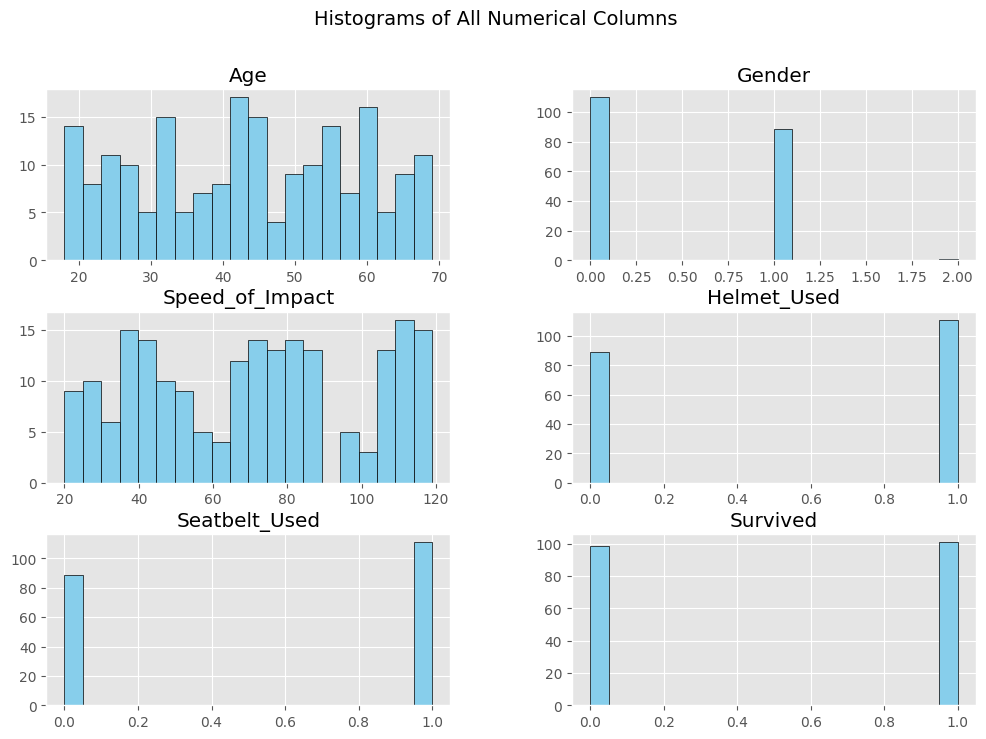

In [ ]:
plt.style.use("ggplot")
df.hist(figsize=(12, 8), bins=20, edgecolor="black", color="skyblue")
plt.suptitle("Histograms of All Numerical Columns", fontsize=14)
plt.show()

**Box Plot After Removing Outliers**

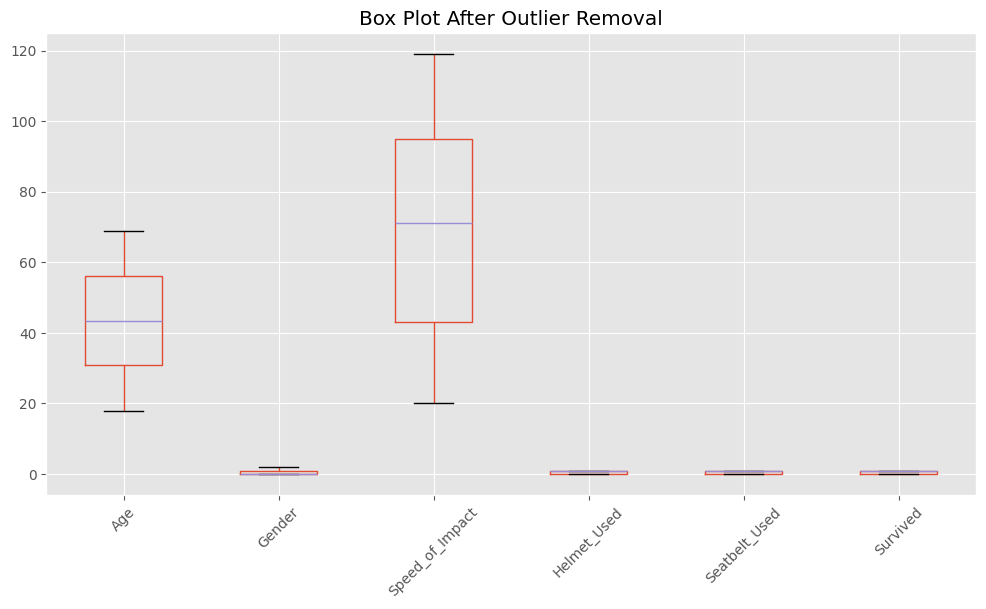

In [ ]:
df_clean = df.copy()
for col in df_clean.columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    df_clean = df_clean[~((df_clean[col] < (Q1 - 1.5 * IQR)) | (df_clean[col] > (Q3 + 1.5 * IQR)))]

# Plot box plots after outlier removal
plt.figure(figsize=(12, 6))
df_clean.boxplot()
plt.title("Box Plot After Outlier Removal")
plt.xticks(rotation=45)
plt.show()


**Skewness And Kurtosis**

In [ ]:
from scipy.stats import skew, kurtosis

# Calculate skewness
skewness = df.skew()

# Calculate kurtosis
kurt = df.kurtosis()

# Display results
print("Skewness of each column:\n", skewness)
print("\nKurtosis of each column:\n", kurt)


Skewness of each column:
 Age               -0.052746
Gender             0.297344
Speed_of_Impact    0.052000
Helmet_Used       -0.223019
Seatbelt_Used     -0.223019
Survived          -0.020152
dtype: float64

Kurtosis of each column:
 Age               -1.167235
Gender            -1.638625
Speed_of_Impact   -1.210430
Helmet_Used       -1.970065
Seatbelt_Used     -1.970065
Survived          -2.019894
dtype: float64


**Splitting the data**

In [ ]:
# Define Features (X) and Target (y)
X = df.drop(columns=["Survived"])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Training the data**

In [ ]:
# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_pred)

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

# Train Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred)

print(f"Logistic Regression Accuracy: {log_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"SVM Accuracy: {svm_acc:.4f}")


Logistic Regression Accuracy: 0.5500
Random Forest Accuracy: 0.4750
SVM Accuracy: 0.4250


**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

# Generate classification reports
log_report = classification_report(y_test, log_pred)
rf_report = classification_report(y_test, rf_pred)
svm_report = classification_report(y_test, svm_pred)

# Print reports
print("=== Logistic Regression Classification Report ===")
print(log_report)

print("\n=== Random Forest Classification Report ===")
print(rf_report)

print("\n=== SVM Classification Report ===")
print(svm_report)


=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

         0.0       0.58      0.68      0.62        22
         1.0       0.50      0.39      0.44        18

    accuracy                           0.55        40
   macro avg       0.54      0.54      0.53        40
weighted avg       0.54      0.55      0.54        40


=== Random Forest Classification Report ===
              precision    recall  f1-score   support

         0.0       0.53      0.45      0.49        22
         1.0       0.43      0.50      0.46        18

    accuracy                           0.47        40
   macro avg       0.48      0.48      0.47        40
weighted avg       0.48      0.47      0.48        40


=== SVM Classification Report ===
              precision    recall  f1-score   support

         0.0       0.48      0.55      0.51        22
         1.0       0.33      0.28      0.30        18

    accuracy                           0.42        4

**Models Comparison**

<ipython-input-12-840abec27c07>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


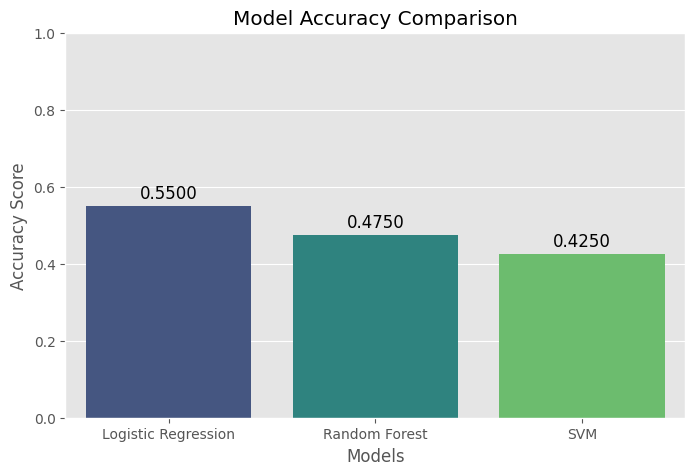

In [ ]:
models = ["Logistic Regression", "Random Forest", "SVM"]
accuracies = [log_acc, rf_acc, svm_acc]
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette="viridis")

plt.ylabel("Accuracy Score")
plt.xlabel("Models")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.4f}", ha="center", fontsize=12)

plt.show()


**Z-Test**

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Number of correct predictions for each model
log_correct = sum(log_pred == y_test)
rf_correct = sum(rf_pred == y_test)
n_total = len(y_test)

# Perform Z-test for proportions
count = np.array([log_correct, rf_correct])
nobs = np.array([n_total, n_total])
z_stat, p_value = proportions_ztest(count, nobs)

print("\nZ-Test Results (Logistic Regression vs. Random Forest)")
print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# if p_value < 0.05:
#     print("Conclusion: Reject the null hypothesis. The accuracies of the two models are significantly different.")
# else:
#     print("Conclusion: Fail to reject the null hypothesis. The accuracies of the two models are not significantly different.")



Z-Test Results (Logistic Regression vs. Random Forest)
Z-Statistic: 0.6710
P-Value: 0.5022
Conclusion: Fail to reject the null hypothesis. The accuracies of the two models are not significantly different.


**T-Test**

In [ ]:
from scipy.stats import ttest_ind

log_pred_binary = np.array(log_pred == y_test, dtype=int)
rf_pred_binary = np.array(rf_pred == y_test, dtype=int)
svm_pred_binary = np.array(svm_pred == y_test, dtype=int)

#Logistic Regression vs. Random Forest
t_stat_log_rf, p_value_log_rf = ttest_ind(log_pred_binary, rf_pred_binary)

#Logistic Regression vs. SVM
t_stat_log_svm, p_value_log_svm = ttest_ind(log_pred_binary, svm_pred_binary)

#Random Forest vs. SVM
t_stat_rf_svm, p_value_rf_svm = ttest_ind(rf_pred_binary, svm_pred_binary)

print("\nT-Test Results :")
print(f"Logistic Regression vs. Random Forest: T-Statistic = {t_stat_log_rf:.4f}, P-Value = {p_value_log_rf:.4f}")
print(f"Logistic Regression vs. SVM: T-Statistic = {t_stat_log_svm:.4f}, P-Value = {p_value_log_svm:.4f}")
print(f"Random Forest vs. SVM: T-Statistic = {t_stat_rf_svm:.4f}, P-Value = {p_value_rf_svm:.4f}")


T-Test Results :
Logistic Regression vs. Random Forest: T-Statistic = 0.6645, P-Value = 0.5084
Logistic Regression vs. SVM: T-Statistic = 1.1131, P-Value = 0.2691
Random Forest vs. SVM: T-Statistic = 0.4444, P-Value = 0.6580
